## **Forest Fires (UCI ML Repository): Exploratory Data Analysis**

**Project Objective:**  

Explore how weather conditions relate to forest fire behavior and identify seasonal patterns in temperature and fire activity using exploratory data analysis.

**What I did in this project:**  

1. Loaded the Forest Fires dataset programmatically from the UCI Machine Learning Repository for full reproducibility.

2. Performed data quality checks and summary analysis to understand the structure and distributions of the data.

3. Analyzed weather variables such as temperature, relative humidity, wind, and rain using visualizations.

4. Examined temporal patterns by day of the week and month of the year using ordered categorical variables.

5. Investigated the burned area variable and applied a log transformation to handle heavy skewness.

6. Used correlation analysis to assess how strongly individual weather variables relate to burned area.

**Dataset:**  

UCI “Forest Fires” dataset (Portugal), accessed through `ucimlrepo`.


In [ ]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data from UCI ML Repository
Fetching the dataset programmatically for reproducibility.


In [8]:
# Fetch Forest Fires dataset from UCI ML Repository
forest_fires = fetch_ucirepo(id=162)

# Features and target
X = forest_fires.data.features
y = forest_fires.data.targets

# Combine into a single DataFrame 
forestfires_data = pd.concat([X, y], axis=1)

forestfires_data.head(), forestfires_data.columns

(   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
 0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
 1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
 2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
 3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
 4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0,
 Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
        'wind', 'rain', 'area'],
       dtype='object'))

## Quick Dataset Overview
A quick schema check and basic missingness scan.


In [19]:
forestfires_data.info()

missing = forestfires_data.isna().sum().sort_values(ascending=False)
missing[missing > 0]

forestfires_data.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X       517 non-null    int64   
 1   Y       517 non-null    int64   
 2   month   517 non-null    category
 3   day     517 non-null    category
 4   FFMC    517 non-null    float64 
 5   DMC     517 non-null    float64 
 6   DC      517 non-null    float64 
 7   ISI     517 non-null    float64 
 8   temp    517 non-null    float64 
 9   RH      517 non-null    int64   
 10  wind    517 non-null    float64 
 11  rain    517 non-null    float64 
 12  area    517 non-null    float64 
dtypes: category(2), float64(8), int64(3)
memory usage: 46.3 KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X,517.0,NaN,NaN,NaN,4.669246,2.313778,1.0,3.0,4.0,7.0,9.0
Y,517.0,NaN,NaN,NaN,4.299807,1.2299,2.0,4.0,4.0,5.0,9.0
month,517,12,aug,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,517,7,sun,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFMC,517.0,NaN,NaN,NaN,90.644681,5.520111,18.7,90.2,91.6,92.9,96.2
DMC,517.0,NaN,NaN,NaN,110.87234,64.046482,1.1,68.6,108.3,142.4,291.3
DC,517.0,NaN,NaN,NaN,547.940039,248.066192,7.9,437.7,664.2,713.9,860.6
ISI,517.0,NaN,NaN,NaN,9.021663,4.559477,0.0,6.5,8.4,10.8,56.1
temp,517.0,NaN,NaN,NaN,18.889168,5.806625,2.2,15.5,19.3,22.8,33.3
RH,517.0,NaN,NaN,NaN,44.288201,16.317469,15.0,33.0,42.0,53.0,100.0


## Target Variable Focus: `area` (Burned Area)

This dataset is commonly used to study/predict **burned area**.  
`area` is typically **highly right-skewed**, so I will also look at `log1p(area)` for more stable analysis.


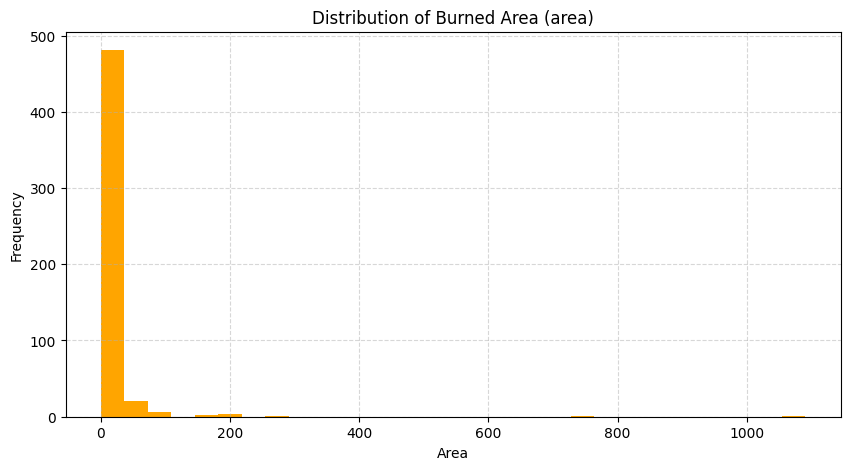

In [31]:
plt.figure(figsize=(10, 5))
plt.hist(forestfires_data['area'], bins=30, color='orange')
plt.title('Distribution of Burned Area (area)')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

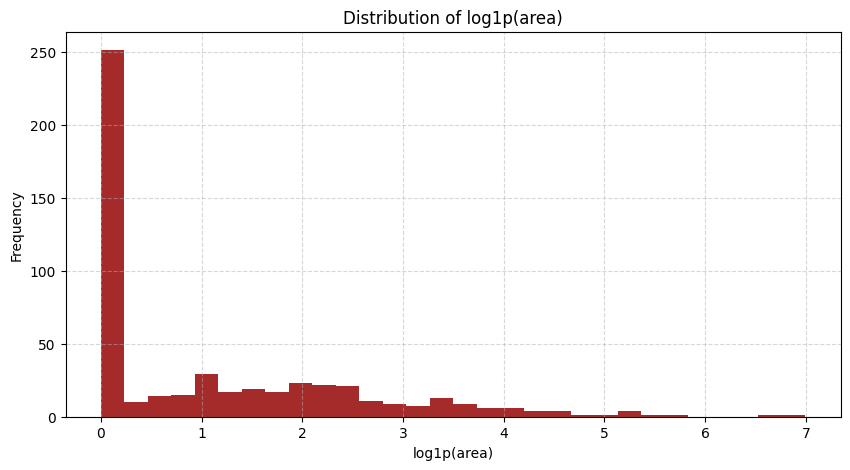

In [30]:
forestfires_data['log_area'] = np.log1p(forestfires_data['area'])

plt.figure(figsize=(10, 5))
plt.hist(forestfires_data['log_area'], bins=30, color='brown')
plt.title('Distribution of log1p(area)')
plt.xlabel('log1p(area)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Metadata
Useful for understanding variable definitions.


In [ ]:
print(forest_fires.metadata)
print(forest_fires.variables)

## Distributions of Key Weather Variables
Histograms for: wind, rain, temp, RH.

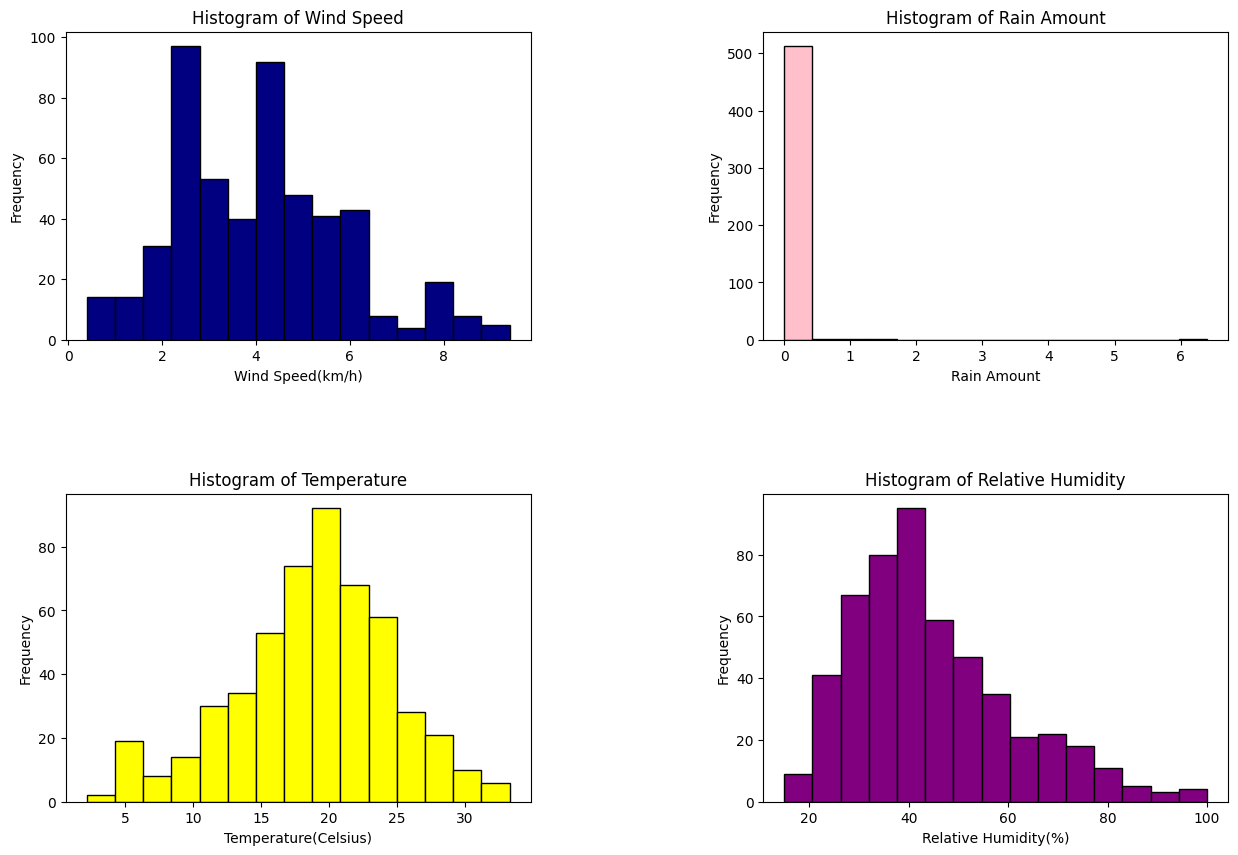

In [32]:
# Create a 2 by 2 subplot, and plot the histogram: 

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)  

# Histogram of wind speed

axs[0, 0].hist(forestfires_data['wind'], bins=15, color='navy', edgecolor='black')
axs[0, 0].set_title('Histogram of Wind Speed')
axs[0, 0].set_xlabel('Wind Speed(km/h)')
axs[0, 0].set_ylabel('Frequency')

# Histogram of rain amount

axs[0, 1].hist(forestfires_data['rain'], bins=15, color='pink', edgecolor='black')
axs[0, 1].set_title('Histogram of Rain Amount')
axs[0, 1].set_xlabel('Rain Amount')
axs[0, 1].set_ylabel('Frequency')

# Histogram of temperature

axs[1, 0].hist(forestfires_data['temp'], bins=15, color='yellow', edgecolor='black')
axs[1, 0].set_title('Histogram of Temperature')
axs[1, 0].set_xlabel('Temperature(Celsius)')
axs[1, 0].set_ylabel('Frequency')

# Histogram of relative humidity

axs[1, 1].hist(forestfires_data['RH'], bins=15, color='purple', edgecolor='black')
axs[1, 1].set_title('Histogram of Relative Humidity')
axs[1, 1].set_xlabel('Relative Humidity(%)')
axs[1, 1].set_ylabel('Frequency')

plt.show()

## Temperature vs Relative Humidity
A quick look at how temperature relates to humidity.


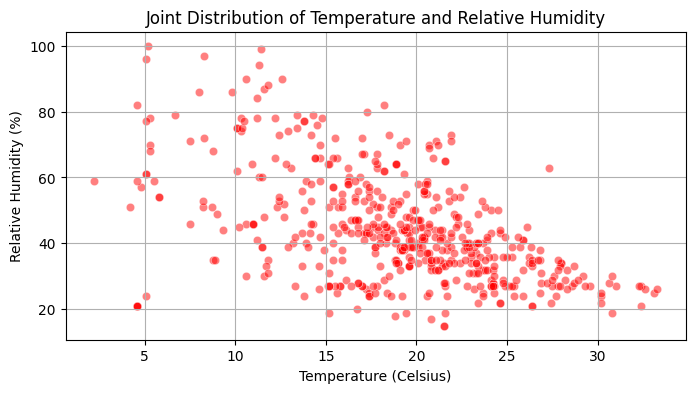

In [45]:
# Create a joint distribution between relative humidity and temperature:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=forestfires_data, x='temp', y='RH', color='red', alpha=0.5)

plt.title('Joint Distribution of Temperature and Relative Humidity')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)

plt.show()

## Relationships With Target (`log1p(area)`)

Comparing key weather features against the transformed target to see basic patterns.


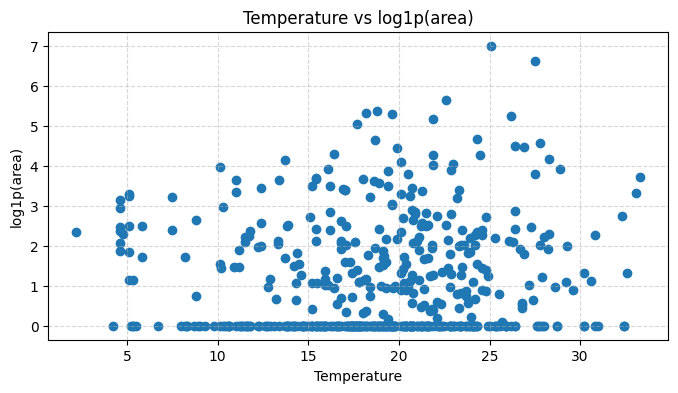

In [42]:
plt.figure(figsize=(8, 4))
plt.scatter(forestfires_data['temp'], forestfires_data['log_area'])
plt.title('Temperature vs log1p(area)')
plt.xlabel('Temperature')
plt.ylabel('log1p(area)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

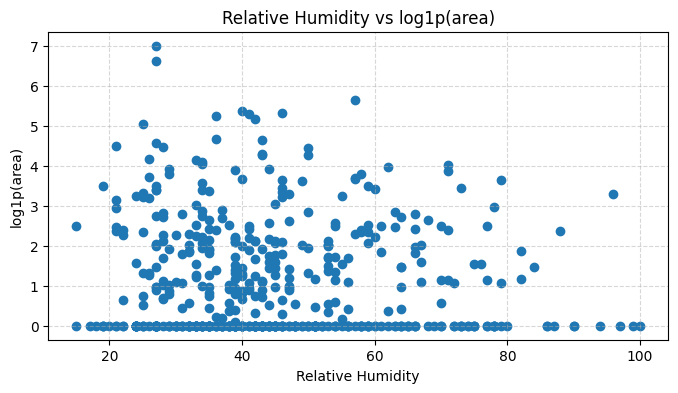

In [46]:
plt.figure(figsize=(8, 4))
plt.scatter(forestfires_data['RH'], forestfires_data['log_area'])
plt.title('Relative Humidity vs log1p(area)')
plt.xlabel('Relative Humidity')
plt.ylabel('log1p(area)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

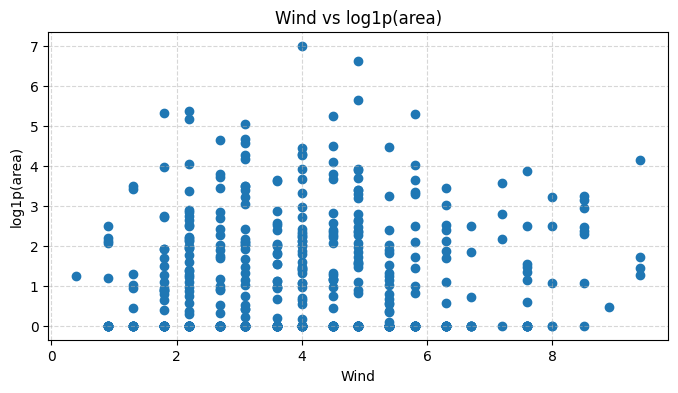

In [48]:
plt.figure(figsize=(8, 4))
plt.scatter(forestfires_data['wind'], forestfires_data['log_area'])
plt.title('Wind vs log1p(area)')
plt.xlabel('Wind')
plt.ylabel('log1p(area)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Average Temperature Across Days of The Week
Ordered categorical so the plot follow calendar order.


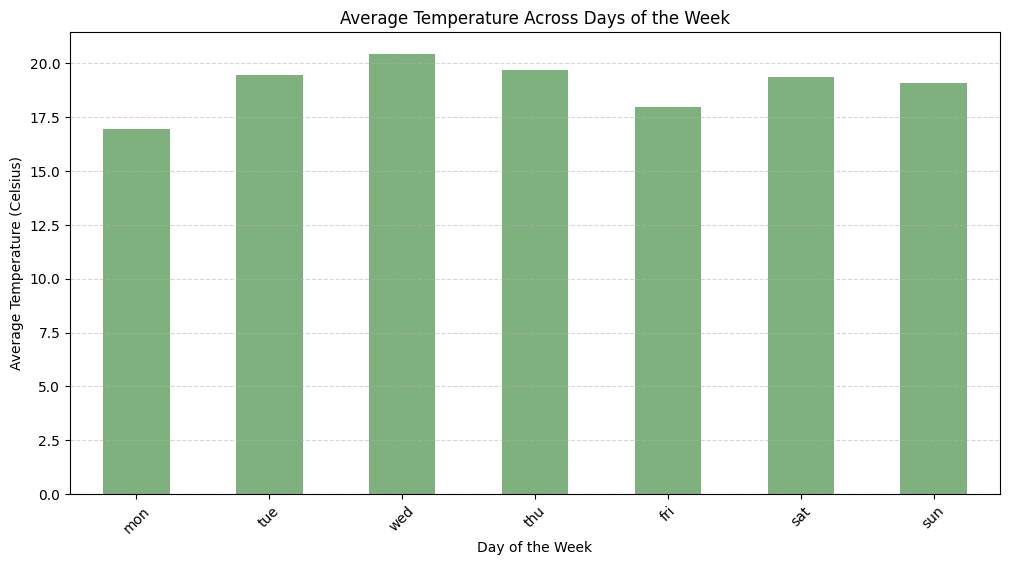

In [40]:
# Create a figure showing how the average temperature is changing across days of a week:

day_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

forestfires_data['day'] = pd.Categorical(
    forestfires_data['day'],
    categories=day_order,
    ordered=True
)

avg_temp = (
    forestfires_data
    .groupby('day', observed=True)['temp']
    .mean()
)

plt.figure(figsize=(12, 6))

avg_temp.plot(kind='bar', color='darkgreen', alpha=0.5)

plt.title('Average Temperature Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Temperature (Celsius)')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


## Average Temperature Across Months of The Year
Ordered categorical months for correct plotting order.


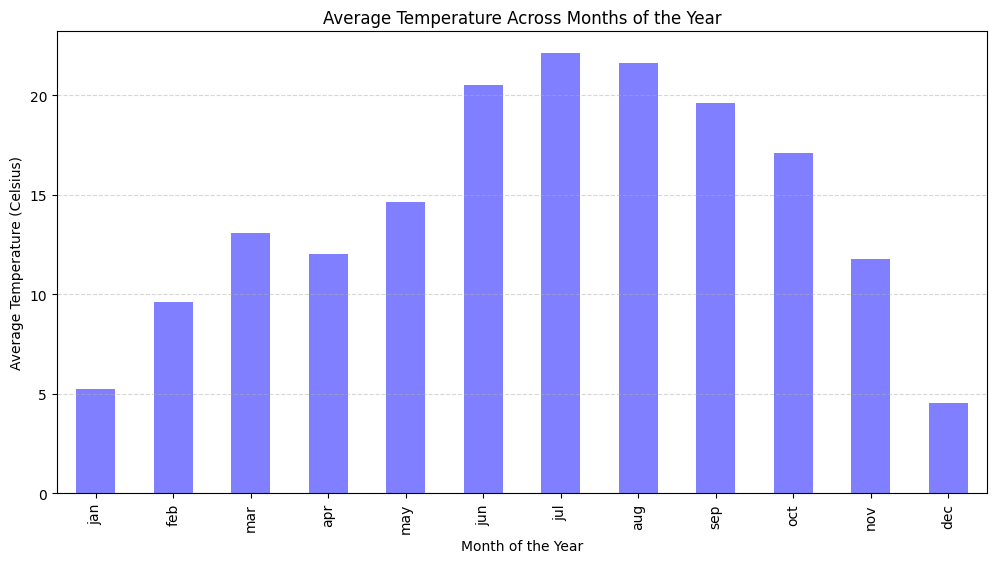

In [38]:
# Create a figure demonstrate how temperature is changing across month of the year.

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

forestfires_data['month'] = pd.Categorical(
    forestfires_data['month'],
    categories=month_order,
    ordered=True
)

avg_temp_month = (
    forestfires_data
    .groupby('month', observed=True)['temp']
    .mean()
)

# Plot average temperature across months of the year
plt.figure(figsize=(12, 6))

avg_temp_month.plot(kind='bar', color='blue', alpha=0.5)

plt.title('Average Temperature Across Months of the Year')
plt.xlabel('Month of the Year')
plt.ylabel('Average Temperature (Celsius)')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


## Monthly Temperature vs Number of Recorded Fire Observations
Comparing average monthly temperature with the count of recorded events/observations in each month.


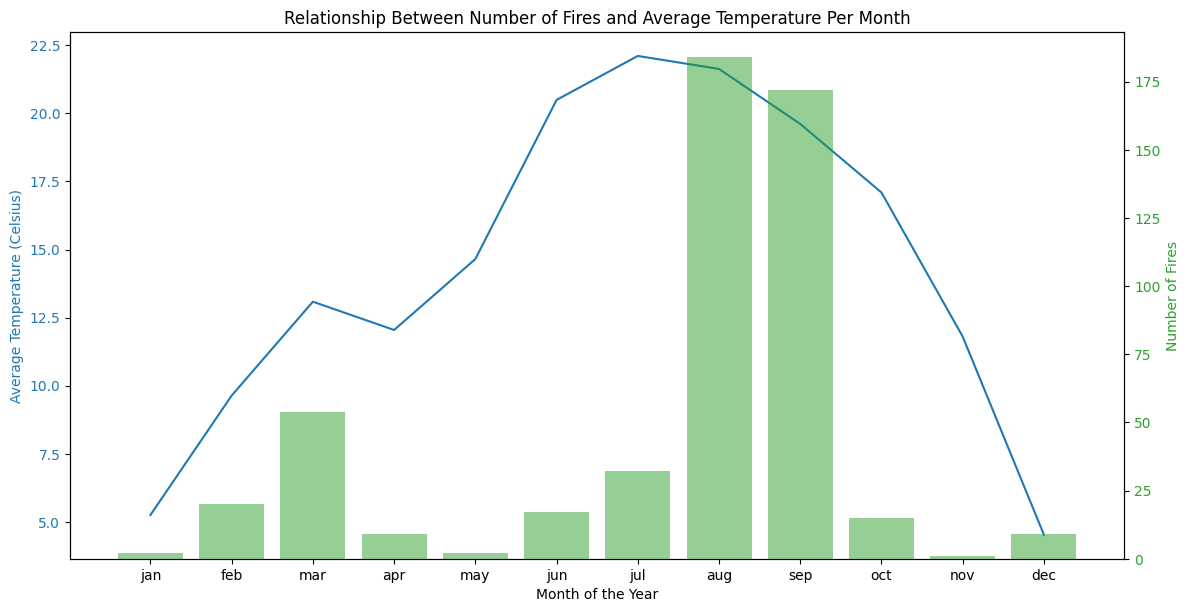

In [39]:
numberoffires_per_month = (
    forestfires_data
    .groupby('month', observed=True)
    .size()
)

monthly_data = pd.DataFrame({
    'Average Temperature': avg_temp_month,
    'Number of Fires': numberoffires_per_month
})

fig, ax1 = plt.subplots(figsize=(12, 6))

# Average Temperature for each month of the year:
color = 'tab:blue'
ax1.set_xlabel('Month of the Year')
ax1.set_ylabel('Average Temperature (Celsius)', color=color)
ax1.plot(monthly_data.index, monthly_data['Average Temperature'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Number of Fires for each month of the year:
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Number of Fires', color=color)
ax2.bar(monthly_data.index, monthly_data['Number of Fires'], color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Relationship Between Number of Fires and Average Temperature Per Month')
plt.show()


## Correlation

A quick correlation matrix helps identify which numeric variables move together and which may relate to burned area.


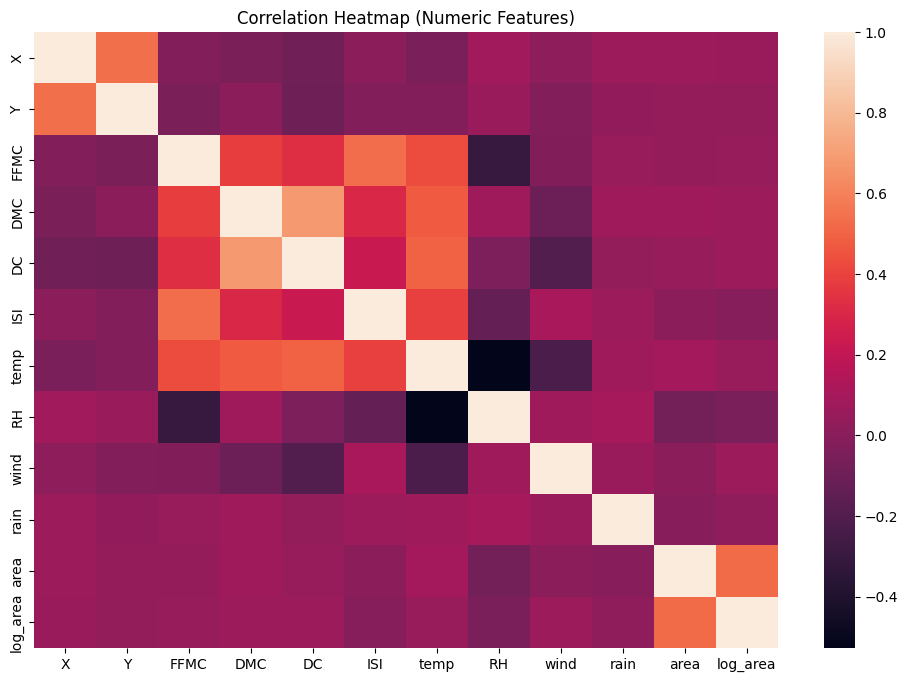

In [49]:
numeric_cols = forestfires_data.select_dtypes(include=[np.number]).columns
corr = forestfires_data[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

## Key Insights

- Identified that burned area `area` is highly right skewed and applied `log1p(area)` to improve interpretability.

- Observed strong seasonality in temperature with peaks in **July and August** and lowest values in **winter months**.

- Found a clear inverse relationship between temperature and relative humidity.

- Noted that most recorded fire observations occur in **late summer**, especially **August and September**.

- Confirmed that burned area has weak linear relationships with individual weather variables, indicating prediction is **nontrivial**.
